<a href="https://colab.research.google.com/github/VarshaJenni99/Sign-Language-Digits-Recognizer/blob/master/sign_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from keras.models import load_model

In [ ]:
from zipfile import ZipFile
with ZipFile("input.zip", 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

train_path = 'input/train'
valid_path = 'input/val'
test_path = 'input/test'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
 
  # useful for getting number of classes
folders = glob('input/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def gray_to_rgb(img):
    return np.repeat(img, 3, 2)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255,)

training_set = train_datagen.flow_from_directory('input/train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('input/val',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

train_set = test_datagen.flow_from_directory('input/test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 1644 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 218 images belonging to 10 classes.


In [ ]:

training_set.image_shape

(100, 100, 3)

In [ ]:
training_set

In [16]:
# fit the model
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
52/52 [==============================] - 181s 3s/step - loss: 0.7333 - accuracy: 0.8169 - val_loss: 0.5136 - val_accuracy: 0.9000
Epoch 2/100
52/52 [==============================] - 180s 3s/step - loss: 0.5425 - accuracy: 0.8613 - val_loss: 0.3964 - val_accuracy: 0.9250
Epoch 3/100
52/52 [==============================] - 181s 3s/step - loss: 0.4356 - accuracy: 0.8948 - val_loss: 0.3212 - val_accuracy: 0.9550
Epoch 4/100
52/52 [==============================] - 181s 3s/step - loss: 0.3600 - accuracy: 0.9197 - val_loss: 0.2661 - val_accuracy: 0.9650
Epoch 5/100
52/52 [==============================] - 181s 3s/step - loss: 0.3396 - accuracy: 0.9191 - val_loss: 0.2463 - val_accuracy: 0.9500
Epoch 6/100
52/52 [==============================] - 181s 3s/step - loss: 0.3027 - accuracy: 0.9209 - val_loss: 0.2178 - val_accuracy: 0.9550
Epoch 7/100
52/52 [==============================] - 181s 3s/step - loss: 0.2677 - accuracy: 0.9428 - val_loss: 0.2025 - val_accuracy: 0.9650
Epoch 

In [17]:
   model.save('signfeatures_new_model.h5')

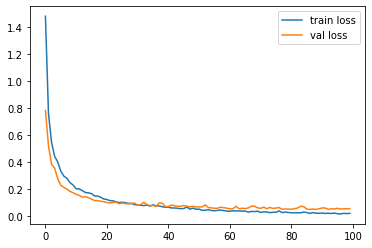

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [18]:
mod = load_model('/content/signfeatures_new_model.h5')

In [19]:
mod.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [37]:
import cv2
img = cv2.imread('/content/IMG_4097.JPG')
img = np.reshape(img,[1,100,100,3])


In [38]:
predictions = mod.predict(img)

In [34]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.7250267e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [39]:
y_classes = predictions.argmax(axis=-1)
y_classes

array([8])